## Midterm Project

In [1]:
# General import for later
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor


def DoKFold(X, y, model, n_splits=10, random_state=1234):
    PE = []    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    for idxtrain, idxtest in kf.split(X):
        Xtrain = X[idxtrain]
        Xtest = X[idxtest]
        ytrain = y[idxtrain]
        ytest = y[idxtest]
        
        model.fit(Xtrain, ytrain)
        y_pred = model.predict(Xtest)
        
        PE.append(np.sqrt(MSE(ytest, y_pred)))
    
    return np.mean(PE)

### Question 1: Import the weatherHistory.csv into a data frame. How many observations do we have?

In [2]:
df = pd.read_csv('weatherHistory.csv')
df
#print("Number of Observations: ", df.shape[0])

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


### Question 2: In the weatherHistory.csv data how many features are just nominal variables?

Nominal Variables: Labels or categories
- Summary
- Precip Type
- Daily Summary

3 variables are nominal data

### Question 3: If we want to use all the unstandardized observations for 'Temperature (C)' and predict the Humidity the resulting root mean squared error is (just copy the first 4 decimal places):

In [3]:
# Extract the columns
temp = df[['Temperature (C)']]
humidity = df[['Humidity']]

# LinearRegression
model = LinearRegression()
model.fit(temp, humidity)
humidity_pred = model.predict(temp)

# Calculate MSE
rmse = np.sqrt(MSE(humidity, humidity_pred))

print("MSE using all the unstandardized Temperature (C) observations to predict Humidity: ", rmse)

MSE using all the unstandardized Temperature (C) observations to predict Humidity:  0.1514437964005473


### Question 4: If the input feature is the Temperature and the target is the Humidity and we consider 20-fold cross validations with random_state=2020, the Ridge model with alpha =0.1 and standardize the input train and the input test data. The average RMSE on the test sets is (provide your answer with the first 6 decimal places):

In [4]:
# Get the data
X = df[['Temperature (C)']].values
y = df[['Humidity']].values

# KFold
kf = KFold(n_splits=20, shuffle=True, random_state=2020)

# Model
model = Ridge(alpha=0.1)
ss = SS()
X_scaled = ss.fit_transform(X)

RMSE = []
for trainidx, testidx in kf.split(X_scaled):
    Xtrain = X_scaled[trainidx]
    Xtest = X_scaled[testidx]
    ytrain = y[trainidx]
    ytest = y[testidx]
    
    Xtrain = ss.fit_transform(Xtrain)
    Xtest = ss.transform(Xtest)
    
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)
    
    RMSE.append(np.sqrt(MSE(ytest, y_pred)))
    #print("Score: ", np.sqrt(MSE(ytest, y_pred)))

    
print("Average RMSE on the test sets: ", np.mean(RMSE))

Average RMSE on the test sets:  0.15143825148125584


In [5]:
DoKFold(X_scaled, y, Ridge(alpha=0.1), n_splits=20, random_state=2020)

0.15143825148164675

### Question 5: Suppose we want to use Random Forrest with 100 trees and max_depth=50 to predict the Humidity with the Apparent Temperature and we want to estimate the root mean squared error by using 10-cross validations (random_state=1693) and computing the average of RMSE on the test sets. The result we get is  (provide your answer with the first 6 decimal places):

In [3]:
# Data
X = df[['Apparent Temperature (C)']].values
y = df[['Humidity']].values

# Model
model = RandomForestRegressor(n_estimators=100, max_depth=50)
kf = KFold(n_splits=10, shuffle=True, random_state=1693)

ss = SS()
X_scaled = ss.fit_transform(X)

RMSE = []
for trainidx, testidx in kf.split(X):
    Xtrain = X[trainidx]
    Xtest = X[testidx]
    ytrain = y[trainidx]
    ytest = y[testidx]
    
    model.fit(Xtrain, ytrain.ravel())
    y_pred = model.predict(Xtest)
    
    RMSE.append(np.sqrt(MSE(ytest, y_pred)))
    
print("Average RMSE Random Forest: ", np.mean(RMSE))

Average RMSE Random Forest:  0.14353615526603972


In [ ]:
DoKFold(X_scaled, y.ravel(), RandomForestRegressor(n_estimators=100, max_depth=50), n_splits=10, random_state=1693)

### Question 6: Suppose we want use polynomial features of degree 6 and we want to predict the Humidity with the Apparent Temperature and we want to estimate the root mean squared error by using 10-fold cross-validations (random_state=1693) and computing the average of RMSE on the test sets. The result we get is  (provide your answer with the first 5 decimal places):

In [4]:
# Data
X = df[['Apparent Temperature (C)']].values
y = df[['Humidity']].values

ss = SS()
X_scaled = ss.fit_transform(X)

# Model
polynomial_features = PolynomialFeatures(degree=6)
X_poly = polynomial_features.fit_transform(X)
X_poly_scaled = ss.fit_transform(X_poly)
model = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=1693)

RMSE = []
for trainidx, testidx in kf.split(X_poly):
    Xtrain = X[trainidx]
    Xtest = X[testidx]
    ytrain = y[trainidx]
    ytest = y[testidx]
    
    Xtrain_poly = polynomial_features.fit_transform(Xtrain)
    Xtest_poly = polynomial_features.transform(Xtest)
    
    model.fit(Xtrain_poly, ytrain)
    y_pred = model.predict(Xtest_poly)
    
    RMSE.append(np.sqrt(MSE(ytest, y_pred)))
    
print("Average RMSE Polynomial Regression: ", np.mean(RMSE))

Average RMSE Polynomial Regression:  0.14346597195873528


In [5]:
DoKFold(X_poly_scaled, y, LinearRegression(),n_splits=10, random_state=1693)

0.14346597195917982

### Question 7: If the input feature is the Temperature and the target is the Humidity and we consider 10-fold cross validations with random_state=1234, the Ridge model with alpha =0.2. Inside the cross-validation loop standardize the input data. The average RMSE on the test sets is (provide your answer with the first 4 decimal places):

In [16]:
# Data
X = df[['Temperature (C)']].values
y = df[['Humidity']].values

# Model
model = Ridge(alpha=0.2)
kf = KFold(n_splits=10, shuffle=True, random_state=1234)
ss = SS()

RMSE = []
for trainidx, testidx in kf.split(X):
    Xtrain = X[trainidx]
    Xtest = X[testidx]
    ytrain = y[trainidx]
    ytest = y[testidx]
    
    Xtrain = ss.fit_transform(Xtrain)
    Xtest = ss.transform(Xtest)
    
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)
    
    RMSE.append(np.sqrt(MSE(ytest, y_pred)))
    
print("Average RMSE Polynomial Regression: ", np.mean(RMSE))

Average RMSE Polynomial Regression:  0.15144461669159875


In [5]:
DoKFold(X, y, Ridge(alpha=0.2), n_splits=10, random_state=1234)

0.1514446166972883

### Question 8: Suppose we use polynomial features of degree 6 and we want to predict the Temperature by using 'Humidity','Wind Speed (km/h)','Pressure (millibars)','Wind Bearing (degrees)' We want to estimate the root mean squared error by using 10-fold cross-validations (random_state=1234) and computing the average of RMSE on the test sets. The result we get is  (provide your answer with the first 4 decimal places):

In [13]:
# Data
X = df[['Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)', 'Wind Bearing (degrees)']].values
y = df[['Temperature (C)']].values

# Model
ss = SS()
X_scaled = ss.fit_transform(X)

polynomial_features = PolynomialFeatures(degree=6)
X_poly = polynomial_features.fit_transform(X)
X_poly_scaled = ss.fit_transform(X_poly)
model = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=1234)

RMSE = []
i = 1
for trainidx, testidx in kf.split(X):
    Xtrain = X[trainidx]
    Xtest = X[testidx]
    ytrain = y[trainidx]
    ytest = y[testidx]
    
    Xtrain = ss.fit_transform(Xtrain)
    Xtest = ss.transform(Xtest)
    
    Xtrain_poly = polynomial_features.fit_transform(Xtrain)
    Xtest_poly = polynomial_features.transform(Xtest)
    
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)
    
    RMSE.append(np.sqrt(MSE(ytest, y_pred)))
    
print("Average RMSE Polynomial Regression 2: ", np.mean(RMSE))

Average RMSE Polynomial Regression 2:  7.270709374247166


In [14]:
# Data
X = df[['Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)', 'Wind Bearing (degrees)']].values
y = df[['Temperature (C)']].values

# Model
ss = SS()
X_scaled = ss.fit_transform(X)

polynomial_features = PolynomialFeatures(degree=6)
X_poly = polynomial_features.fit_transform(X)
X_poly_scaled = ss.fit_transform(X_poly)
model = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=1234)

RMSE = []
i = 1
for trainidx, testidx in kf.split(X_poly):
    Xtrain = X_poly[trainidx]
    Xtest = X_poly[testidx]
    ytrain = y[trainidx]
    ytest = y[testidx]
    
    Xtrain = ss.fit_transform(Xtrain)
    Xtest = ss.transform(Xtest)
        
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)
    
    RMSE.append(np.sqrt(MSE(ytest, y_pred)))
    
print("Average RMSE Polynomial Regression 2: ", np.mean(RMSE))

Average RMSE Polynomial Regression 2:  6.0234742758085495


### Question 9: Suppose we use Random Forest with 100 trees and max_depth=50 and we want to predict the Temperature by using 'Humidity','Wind Speed (km/h)','Pressure (millibars)','Wind Bearing (degrees)' We want to estimate the root mean squared error by using 10-fold cross-validations (random_state=1234) and computing the average of RMSE on the test sets. The result we get is  (provide your answer with the first 4 decimal places):

In [17]:
# Data
X = df[['Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)', 'Wind Bearing (degrees)']].values
y = df[['Temperature (C)']].values

# Model
model = RandomForestRegressor(n_estimators=100, max_depth=50)
kf = KFold(n_splits=10, shuffle=True, random_state=1234)

for i in range(0,10):
    RMSE = []

    for trainidx, testidx in kf.split(X):
        Xtrain = X[trainidx]
        Xtest = X[testidx]
        ytrain = y[trainidx]
        ytest = y[testidx]

        Xtrain = ss.fit_transform(Xtrain)
        Xtest = ss.transform(Xtest)

        model.fit(Xtrain, ytrain.ravel())
        y_pred = model.predict(Xtest)

        RMSE.append(np.sqrt(MSE(ytest, y_pred)))

    print("Average RMSE Random Forest 2: ", np.mean(RMSE))

Average RMSE Random Forest 2:  5.8312256918131515
Average RMSE Random Forest 2:  5.833871649039011
Average RMSE Random Forest 2:  5.833459108016011
Average RMSE Random Forest 2:  5.830842714243756
Average RMSE Random Forest 2:  5.832954158675077
Average RMSE Random Forest 2:  5.832068049454925
Average RMSE Random Forest 2:  5.829805967689619
Average RMSE Random Forest 2:  5.833821255285307
Average RMSE Random Forest 2:  5.8349054365606765
Average RMSE Random Forest 2:  5.8314367286780655


### Question 10: If we visualize a scatter plot for Temperature (on the horizontal axis) vs Humidity (on the vertical axis) the overall trend seems to be...

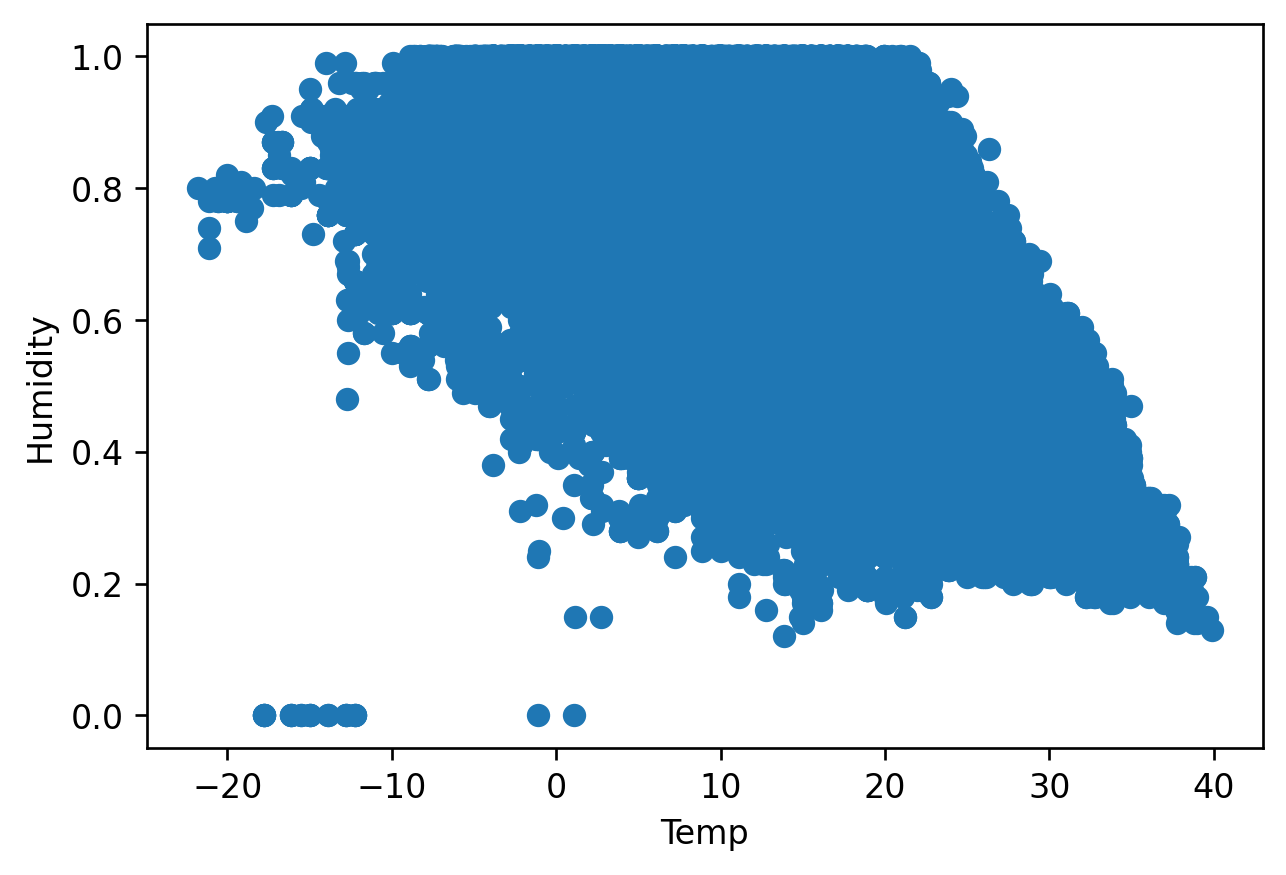

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

X = df[['Temperature (C)']].values
y = df[['Humidity']].values

plt.subplots()
plt.scatter(X, y)
plt.xlabel("Temp")
plt.ylabel("Humidity")
plt.show()